## Mentions:

* dataset: http://cs.stanford.edu/~acoates/stl10
* loading code: https://github.com/mttk/STL10

In [2]:
from __future__ import print_function

import sys
import os, sys, tarfile, errno
import numpy as np
import matplotlib.pyplot as plt
    
if sys.version_info >= (3, 0, 0):
    import urllib.request as urllib # ugly but works
else:
    import urllib

try:
    from imageio import imsave
except:
    from scipy.misc import imsave

print(sys.version_info) 

sys.version_info(major=3, minor=6, micro=8, releaselevel='final', serial=0)


## Dataset url and paths

In [3]:
# image shape
HEIGHT = 96
WIDTH = 96
DEPTH = 3

# size of a single image in bytes
SIZE = HEIGHT * WIDTH * DEPTH

# path to the directory with the data
DATA_DIR = './data'

# url of the binary data
DATA_URL = 'http://ai.stanford.edu/~acoates/stl10/stl10_binary.tar.gz'

# path to the binary train file with image data
DATA_PATH = './data/stl10_binary/train_X.bin'

# path to the binary train file with labels
LABEL_PATH = './data/stl10_binary/train_y.bin'

# path to the binary train file with image data
DATA_PATH_UNLABELED = './data/stl10_binary/unlabeled_X.bin'

## Functions for loading and reading the dataset

In [4]:
def read_labels(path_to_labels):
    """
    :param path_to_labels: path to the binary file containing labels from the STL-10 dataset
    :return: an array containing the labels
    """
    with open(path_to_labels, 'rb') as f:
        labels = np.fromfile(f, dtype=np.uint8)
        return labels


def read_all_images(path_to_data):
    """
    :param path_to_data: the file containing the binary images from the STL-10 dataset
    :return: an array containing all the images
    """

    with open(path_to_data, 'rb') as f:
        # read whole file in uint8 chunks
        everything = np.fromfile(f, dtype=np.uint8)

        # We force the data into 3x96x96 chunks, since the
        # images are stored in "column-major order", meaning
        # that "the first 96*96 values are the red channel,
        # the next 96*96 are green, and the last are blue."
        # The -1 is since the size of the pictures depends
        # on the input file, and this way numpy determines
        # the size on its own.

        images = np.reshape(everything, (-1, 3, 96, 96))

        # Now transpose the images into a standard image format
        # readable by, for example, matplotlib.imshow
        # You might want to comment this line or reverse the shuffle
        # if you will use a learning algorithm like CNN, since they like
        # their channels separated.
        images = np.transpose(images, (0, 3, 2, 1))
        return images


def read_single_image(image_file):
    """
    CAREFUL! - this method uses a file as input instead of the path - so the
    position of the reader will be remembered outside of context of this method.
    :param image_file: the open file containing the images
    :return: a single image
    """
    # read a single image, count determines the number of uint8's to read
    image = np.fromfile(image_file, dtype=np.uint8, count=SIZE)
    # force into image matrix
    image = np.reshape(image, (3, 96, 96))
    # transpose to standard format
    # You might want to comment this line or reverse the shuffle
    # if you will use a learning algorithm like CNN, since they like
    # their channels separated.
    image = np.transpose(image, (2, 1, 0))
    return image


def plot_image(image):
    """
    :param image: the image to be plotted in a 3-D matrix format
    :return: None
    """
    plt.imshow(image)
    plt.show()

def save_image(image, name):
    imsave("%s.png" % name, image, format="png")

def download_and_extract():
    """
    Download and extract the STL-10 dataset
    :return: None
    """
    dest_directory = DATA_DIR
    if not os.path.exists(dest_directory):
        os.makedirs(dest_directory)
    filename = DATA_URL.split('/')[-1]
    filepath = os.path.join(dest_directory, filename)
    if not os.path.exists(filepath):
        def _progress(count, block_size, total_size):
            sys.stdout.write('\rDownloading %s %.2f%%' % (filename,
                float(count * block_size) / float(total_size) * 100.0))
            sys.stdout.flush()
        filepath, _ = urllib.urlretrieve(DATA_URL, filepath, reporthook=_progress)
        print('Downloaded', filename)
        tarfile.open(filepath, 'r:gz').extractall(dest_directory)

def save_images(images, labels):
    print("Saving images to disk")
    i = 0
    for image in images:
        label = labels[i]
        directory = './img/' + str(label) + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1

def save_unlabeled_images(images):
    print("Saving unlabeled images to disk")
    i = 0
    for image in images:
        directory = './img_unlabeled/' + '/'
        try:
            os.makedirs(directory, exist_ok=True)
        except OSError as exc:
            if exc.errno == errno.EEXIST:
                pass
        filename = directory + str(i)
        print(filename)
        save_image(image, filename)
        i = i+1

## Download raw dataset

In [6]:
# download data if needed
download_and_extract()

## Read train images

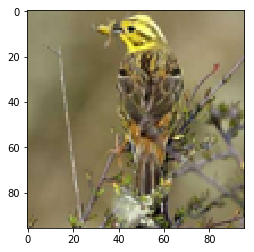

In [7]:
# test to check if the image is read correctly
with open(DATA_PATH) as f:
    image = read_single_image(f)
    plot_image(image)

In [8]:
# test to check if the whole dataset is read correctly
images = read_all_images(DATA_PATH)
print(images.shape)

(5000, 96, 96, 3)


In [9]:
labels = read_labels(LABEL_PATH)
print(labels.shape)

(5000,)


In [10]:
# save images to disk
save_images(images, labels)

Saving images to disk
./img/2/0
./img/6/1
./img/2/2
./img/7/3
./img/4/4
./img/10/5
./img/8/6
./img/5/7
./img/6/8
./img/9/9
./img/1/10
./img/7/11
./img/1/12
./img/9/13
./img/8/14
./img/7/15
./img/5/16
./img/7/17
./img/3/18
./img/3/19
./img/2/20
./img/2/21
./img/7/22
./img/3/23
./img/2/24
./img/9/25
./img/6/26
./img/2/27
./img/6/28
./img/6/29
./img/1/30
./img/1/31
./img/1/32
./img/2/33
./img/4/34
./img/7/35
./img/8/36
./img/3/37
./img/2/38
./img/4/39
./img/2/40
./img/7/41
./img/2/42
./img/4/43
./img/8/44
./img/5/45
./img/4/46
./img/1/47
./img/7/48
./img/8/49
./img/7/50
./img/6/51
./img/9/52
./img/1/53
./img/7/54
./img/2/55
./img/4/56
./img/7/57
./img/9/58
./img/3/59
./img/3/60
./img/10/61
./img/10/62
./img/6/63
./img/2/64
./img/8/65
./img/9/66
./img/8/67
./img/9/68
./img/9/69
./img/10/70
./img/1/71
./img/6/72
./img/1/73
./img/3/74
./img/6/75
./img/6/76
./img/8/77
./img/9/78
./img/10/79
./img/6/80
./img/1/81
./img/9/82
./img/4/83
./img/3/84
./img/10/85
./img/7/86
./img/6/87
./img/9/88
./i

./img/10/700
./img/7/701
./img/8/702
./img/5/703
./img/10/704
./img/10/705
./img/3/706
./img/8/707
./img/1/708
./img/6/709
./img/5/710
./img/1/711
./img/3/712
./img/8/713
./img/10/714
./img/6/715
./img/5/716
./img/5/717
./img/9/718
./img/1/719
./img/6/720
./img/7/721
./img/5/722
./img/9/723
./img/2/724
./img/3/725
./img/1/726
./img/10/727
./img/4/728
./img/2/729
./img/1/730
./img/9/731
./img/3/732
./img/1/733
./img/8/734
./img/5/735
./img/1/736
./img/5/737
./img/7/738
./img/4/739
./img/1/740
./img/4/741
./img/5/742
./img/7/743
./img/1/744
./img/8/745
./img/6/746
./img/6/747
./img/1/748
./img/6/749
./img/3/750
./img/9/751
./img/7/752
./img/2/753
./img/9/754
./img/6/755
./img/8/756
./img/4/757
./img/2/758
./img/4/759
./img/10/760
./img/7/761
./img/2/762
./img/8/763
./img/8/764
./img/5/765
./img/2/766
./img/3/767
./img/1/768
./img/8/769
./img/3/770
./img/8/771
./img/3/772
./img/8/773
./img/8/774
./img/6/775
./img/2/776
./img/4/777
./img/10/778
./img/1/779
./img/2/780
./img/1/781
./img/8/7

./img/9/1378
./img/10/1379
./img/6/1380
./img/5/1381
./img/1/1382
./img/10/1383
./img/5/1384
./img/1/1385
./img/6/1386
./img/5/1387
./img/8/1388
./img/6/1389
./img/5/1390
./img/2/1391
./img/6/1392
./img/8/1393
./img/8/1394
./img/5/1395
./img/6/1396
./img/8/1397
./img/7/1398
./img/3/1399
./img/3/1400
./img/6/1401
./img/7/1402
./img/1/1403
./img/10/1404
./img/5/1405
./img/6/1406
./img/1/1407
./img/6/1408
./img/7/1409
./img/6/1410
./img/1/1411
./img/1/1412
./img/8/1413
./img/5/1414
./img/6/1415
./img/9/1416
./img/7/1417
./img/7/1418
./img/3/1419
./img/2/1420
./img/6/1421
./img/5/1422
./img/9/1423
./img/8/1424
./img/7/1425
./img/6/1426
./img/2/1427
./img/10/1428
./img/8/1429
./img/10/1430
./img/9/1431
./img/6/1432
./img/7/1433
./img/7/1434
./img/8/1435
./img/3/1436
./img/3/1437
./img/8/1438
./img/7/1439
./img/8/1440
./img/10/1441
./img/7/1442
./img/10/1443
./img/1/1444
./img/2/1445
./img/4/1446
./img/6/1447
./img/10/1448
./img/1/1449
./img/5/1450
./img/1/1451
./img/1/1452
./img/9/1453
./im

./img/2/2031
./img/8/2032
./img/1/2033
./img/7/2034
./img/3/2035
./img/9/2036
./img/5/2037
./img/1/2038
./img/5/2039
./img/1/2040
./img/3/2041
./img/4/2042
./img/3/2043
./img/9/2044
./img/8/2045
./img/5/2046
./img/1/2047
./img/3/2048
./img/3/2049
./img/2/2050
./img/3/2051
./img/3/2052
./img/4/2053
./img/1/2054
./img/4/2055
./img/1/2056
./img/7/2057
./img/6/2058
./img/10/2059
./img/5/2060
./img/10/2061
./img/6/2062
./img/8/2063
./img/5/2064
./img/6/2065
./img/2/2066
./img/6/2067
./img/3/2068
./img/9/2069
./img/10/2070
./img/1/2071
./img/5/2072
./img/4/2073
./img/3/2074
./img/5/2075
./img/1/2076
./img/3/2077
./img/9/2078
./img/1/2079
./img/10/2080
./img/9/2081
./img/8/2082
./img/7/2083
./img/10/2084
./img/3/2085
./img/10/2086
./img/3/2087
./img/7/2088
./img/8/2089
./img/9/2090
./img/8/2091
./img/7/2092
./img/10/2093
./img/1/2094
./img/4/2095
./img/5/2096
./img/10/2097
./img/5/2098
./img/10/2099
./img/1/2100
./img/1/2101
./img/4/2102
./img/4/2103
./img/7/2104
./img/6/2105
./img/3/2106
./i

./img/2/2691
./img/5/2692
./img/8/2693
./img/10/2694
./img/1/2695
./img/4/2696
./img/3/2697
./img/4/2698
./img/6/2699
./img/4/2700
./img/2/2701
./img/4/2702
./img/5/2703
./img/7/2704
./img/6/2705
./img/6/2706
./img/6/2707
./img/7/2708
./img/7/2709
./img/1/2710
./img/8/2711
./img/8/2712
./img/9/2713
./img/4/2714
./img/10/2715
./img/7/2716
./img/4/2717
./img/8/2718
./img/1/2719
./img/8/2720
./img/4/2721
./img/10/2722
./img/1/2723
./img/10/2724
./img/8/2725
./img/4/2726
./img/3/2727
./img/6/2728
./img/2/2729
./img/7/2730
./img/2/2731
./img/6/2732
./img/7/2733
./img/5/2734
./img/2/2735
./img/2/2736
./img/5/2737
./img/10/2738
./img/2/2739
./img/5/2740
./img/1/2741
./img/9/2742
./img/2/2743
./img/8/2744
./img/3/2745
./img/9/2746
./img/8/2747
./img/8/2748
./img/7/2749
./img/6/2750
./img/6/2751
./img/3/2752
./img/6/2753
./img/7/2754
./img/1/2755
./img/7/2756
./img/4/2757
./img/5/2758
./img/3/2759
./img/3/2760
./img/3/2761
./img/2/2762
./img/7/2763
./img/3/2764
./img/5/2765
./img/4/2766
./img/7

./img/4/3336
./img/7/3337
./img/5/3338
./img/10/3339
./img/3/3340
./img/1/3341
./img/8/3342
./img/7/3343
./img/6/3344
./img/3/3345
./img/5/3346
./img/9/3347
./img/8/3348
./img/6/3349
./img/6/3350
./img/10/3351
./img/2/3352
./img/9/3353
./img/5/3354
./img/7/3355
./img/1/3356
./img/7/3357
./img/2/3358
./img/2/3359
./img/10/3360
./img/9/3361
./img/7/3362
./img/2/3363
./img/7/3364
./img/1/3365
./img/8/3366
./img/7/3367
./img/3/3368
./img/7/3369
./img/6/3370
./img/3/3371
./img/3/3372
./img/1/3373
./img/5/3374
./img/2/3375
./img/5/3376
./img/3/3377
./img/1/3378
./img/10/3379
./img/5/3380
./img/3/3381
./img/8/3382
./img/3/3383
./img/10/3384
./img/8/3385
./img/2/3386
./img/3/3387
./img/7/3388
./img/9/3389
./img/5/3390
./img/8/3391
./img/8/3392
./img/8/3393
./img/8/3394
./img/1/3395
./img/2/3396
./img/9/3397
./img/10/3398
./img/9/3399
./img/9/3400
./img/9/3401
./img/6/3402
./img/4/3403
./img/2/3404
./img/8/3405
./img/5/3406
./img/7/3407
./img/7/3408
./img/4/3409
./img/9/3410
./img/5/3411
./img/

./img/8/3989
./img/8/3990
./img/4/3991
./img/4/3992
./img/6/3993
./img/8/3994
./img/2/3995
./img/6/3996
./img/3/3997
./img/3/3998
./img/4/3999
./img/4/4000
./img/6/4001
./img/1/4002
./img/1/4003
./img/10/4004
./img/8/4005
./img/10/4006
./img/2/4007
./img/10/4008
./img/5/4009
./img/3/4010
./img/7/4011
./img/2/4012
./img/1/4013
./img/9/4014
./img/3/4015
./img/2/4016
./img/3/4017
./img/6/4018
./img/7/4019
./img/5/4020
./img/4/4021
./img/2/4022
./img/3/4023
./img/6/4024
./img/1/4025
./img/7/4026
./img/3/4027
./img/6/4028
./img/2/4029
./img/8/4030
./img/6/4031
./img/7/4032
./img/7/4033
./img/2/4034
./img/9/4035
./img/5/4036
./img/1/4037
./img/7/4038
./img/3/4039
./img/3/4040
./img/1/4041
./img/7/4042
./img/1/4043
./img/3/4044
./img/3/4045
./img/8/4046
./img/4/4047
./img/2/4048
./img/6/4049
./img/3/4050
./img/2/4051
./img/3/4052
./img/3/4053
./img/9/4054
./img/10/4055
./img/10/4056
./img/3/4057
./img/10/4058
./img/6/4059
./img/6/4060
./img/5/4061
./img/4/4062
./img/3/4063
./img/10/4064
./img

./img/9/4648
./img/6/4649
./img/8/4650
./img/2/4651
./img/1/4652
./img/1/4653
./img/1/4654
./img/8/4655
./img/4/4656
./img/4/4657
./img/10/4658
./img/6/4659
./img/3/4660
./img/6/4661
./img/8/4662
./img/9/4663
./img/2/4664
./img/4/4665
./img/6/4666
./img/4/4667
./img/5/4668
./img/10/4669
./img/4/4670
./img/6/4671
./img/9/4672
./img/8/4673
./img/8/4674
./img/6/4675
./img/2/4676
./img/9/4677
./img/8/4678
./img/7/4679
./img/2/4680
./img/10/4681
./img/10/4682
./img/10/4683
./img/5/4684
./img/4/4685
./img/5/4686
./img/1/4687
./img/2/4688
./img/6/4689
./img/2/4690
./img/5/4691
./img/3/4692
./img/9/4693
./img/5/4694
./img/1/4695
./img/10/4696
./img/9/4697
./img/2/4698
./img/5/4699
./img/5/4700
./img/9/4701
./img/2/4702
./img/9/4703
./img/8/4704
./img/10/4705
./img/6/4706
./img/3/4707
./img/7/4708
./img/2/4709
./img/2/4710
./img/5/4711
./img/8/4712
./img/2/4713
./img/6/4714
./img/3/4715
./img/7/4716
./img/6/4717
./img/10/4718
./img/9/4719
./img/4/4720
./img/2/4721
./img/5/4722
./img/1/4723
./im

## Read Unlabeled images

In [ ]:
# test to check if the image is read correctly
with open(DATA_PATH_UNLABELED) as f:
    image = read_single_image(f)
    plot_image(image)

# test to check if the whole dataset is read correctly
images_unlabeled = read_all_images(DATA_PATH_UNLABELED)
print(images_unlabeled.shape)

# save images to disk
save_unlabeled_images(images_unlabeled)